<a href="https://www.kaggle.com/code/datasniffer/introduction-to-particle-filters?scriptVersionId=183163721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Understanding Particle Filters

Particle filters are a type of algorithm used to estimate the state of a dynamic system when the system is partially observable and evolves over time. The main objective of particle filters is to maintain and update a set of possible states (called particles) that represent the probability distribution of the system's true state. These particles are used to approximate the posterior distribution of the system's state given the observations.

#### Uses

Particle filters are widely used in various applications, especially when dealing with non-linear and non-Gaussian systems. Some common uses include:

1. **Robotics**: For localization and mapping, where a robot estimates its position and maps the environment simultaneously.
2. **Tracking**: In tracking objects or people in video streams or radar systems.
3. **Navigation**: In autonomous vehicles or aircraft, where estimating the position and velocity is crucial.
4. **Economics**: For modeling and predicting economic indicators that evolve over time.

#### How Particle Filters Work

1. **Initialization**: A set of particles is generated based on an initial guess of the system's state. Each particle represents a possible state.

2. **Prediction (Propagation)**: The state of each particle is updated according to the system's dynamics, often incorporating some random noise to account for uncertainty in the system.

3. **Update (Weighting)**: Each particle is assigned a weight based on how well it matches the latest observation. Particles that are more consistent with the observation receive higher weights.

4. **Resampling**: Particles are resampled based on their weights to focus on more probable states. This step helps to avoid degeneracy, where most particles have very low weights.

5. **Iteration**: Steps 2 to 4 are repeated for each new observation, continually refining the estimate of the system's state.


<details style="background:#eef"><summary style="background:white"><span style="color:blue;text-decoration:underline">Comparison to Kalman Filters</span></summary>

The Kalman filter is another popular algorithm for state estimation, particularly for linear and Gaussian systems. Here's how particle filters compare to Kalman filters:

1. **System Model**:
   - **Kalman Filter**: Assumes linear dynamics (although the Extended Kalman Filter can handle nonlinear dynamics) and Gaussian noise.
   - **Particle Filter**: Can handle non-linear dynamics and non-Gaussian noise.

2. **State Representation**:
   - **Kalman Filter**: Uses a single mean and covariance to represent the state distribution.
   - **Particle Filter**: Uses a set of particles to represent the state distribution, allowing for a more flexible and accurate approximation of complex distributions.

3. **Update Mechanism**:
   - **Kalman Filter**: Updates the mean and covariance using a set of linear equations.
   - **Particle Filter**: Updates each particle individually based on the likelihood of the observation, followed by a resampling step.

</details>

#### Example: Simplified Robot Localization

Imagine a robot trying to figure out its position in a room:

1. **Initialization**: The robot starts with many guesses (particles) of where it might be.
2. **Prediction**: As the robot moves, each guess is updated based on its movement model, with some randomness to account for uncertainty.
3. **Update**: The robot receives a sensor reading (like distance to a wall). Each guess is weighted based on how well it matches this reading.
4. **Resampling**: The robot keeps the most likely guesses and discards the less likely ones, focusing on the most probable positions.

Over time, the robot's guesses converge to its true position, even if its movement and sensor readings are noisy and non-linear.

Particle filters are a powerful tool for estimating the state of complex, dynamic systems, especially when dealing with non-linearities and non-Gaussian noise. They provide a flexible alternative to Kalman filters, suitable for a wide range of applications in fields like robotics, navigation, and tracking.

---
### Types of Dynamical Systems States Estimated by Particle Filters

Particle filters are designed to estimate the states of dynamical systems, particularly those that are non-linear and/or have non-Gaussian noise. These systems can be described by state-space models where the state evolves over time and observations are made at discrete time intervals. The states can represent various physical quantities such as position, velocity, temperature, or any other variable that changes over time.

### Fundamental Equations of Particle Filters

To understand how particle filters estimate these states, let's look at the fundamental equations involved.

#### State-Space Model

A dynamical system can be described by two key equations:

1. **State Transition Equation**:
   This equation describes how the system's state evolves from one time step to the next.

   $$
   X_t = f(X_{t-1}, u_t) + \eta_t
   $$
   - $ X_t $: State of the system at time $ t $.
   - $ f $: State transition function that models the dynamics of the system.
   - $ u_t $: Control input at time $ t $ (if any).
   - $ \eta_t $: Process noise, typically assumed to be drawn from a noise distribution $ p(\eta_t) $.

2. **Observation Equation**:
   This equation describes how the observations (measurements) relate to the state.
   $$
   Y_t = h(X_t) + \epsilon_t
   $$
   - $ Y_t $: Observation at time $ t $.
   - $ h $: Observation function that models how the state maps to observations.
   - $ \epsilon_t $: Observation noise, typically assumed to be drawn from a noise distribution $ p(\epsilon_t) $.

#### Particle Filter Algorithm

1. **Initialization**:
   Initialize $ N $ particles by sampling from the prior distribution $ p(X_0) $.
   $$
   X_0^i \sim p(X_0) \quad \text{for} \quad i = 1, 2, \ldots, N
   $$

2. **Prediction (Propagation)**:
   Propagate each particle forward according to the state transition function and process noise.
   $$
   X_t^i = f(X_{t-1}^i, u_t) + \eta_t^i \quad \text{for} \quad i = 1, 2, \ldots, N
   $$
   - $ \eta_t^i \sim p(\eta_t) $

3. **Update (Weighting)**:
   Compute the weight of each particle based on the likelihood of the observation given the particle's state.
   $$
   w_t^i = p(Y_t | X_t^i) \quad \text{for} \quad i = 1, 2, \ldots, N
   $$

4. **Normalization**:
   Normalize the weights so that they sum to 1.
   $$
   \tilde{w}_t^i = \frac{w_t^i}{\sum_{j=1}^N w_t^j} \quad \text{for} \quad i = 1, 2, \ldots, N
   $$

5. **Resampling**:
   Resample $ N $ particles from the current set of particles based on the normalized weights to form the new set of particles.
   $$
   X_t^{i'} \sim \sum_{j=1}^N \tilde{w}_t^j \delta(X_t^j) \quad \text{for} \quad i' = 1, 2, \ldots, N
   $$
   here $ \delta $ is the Dirac delta function.
   
   The notation $$ X_t^{i'} \sim \sum_{j=1}^N \tilde{w}_t^j \delta(X_t^j) $$ means that the new particle $ X_t^{i'} $ is sampled from a discrete distribution. This distribution has:
   - Values $ X_t^j $ (the states of the particles at time $ t $).
   - Probabilities $ \tilde{w}_t^j $ (the normalized weights of these particles).
   
   In other words, $ X_t^{i'} $ is chosen from the set of particles $ \{X_t^1, X_t^2, \ldots, X_t^N\} $ with each particle $ X_t^j $ being selected (with replacement) with probability $ \tilde{w}_t^j $.
   
   This resampling step ensures that particles with higher weights (i.e., those that are more consistent with the observed data) are more likely to be chosen, and particles with lower weights are less likely to be chosen. This helps in focusing computational resources on the more probable regions of the state space, thereby improving the performance of the particle filter.

6. **Iteration**:
   Repeat steps 2 to 5 for each new observation.

### Key Points

- **State Transition**: The state of the system evolves over time according to a possibly non-linear function and is influenced by process noise.
- **Observation Model**: Observations are related to the state through another function and are subject to observation noise.
- **Particle Representation**: A set of particles represents the probability distribution of the state.
- **Resampling**: Helps focus computational resources on the most probable states by retaining particles with higher weights and discarding those with lower weights.

### Example (continued)

Consider a robot trying to estimate its position and velocity in a 2D space. The state $ X_t $ could be $[x, y, v_x, v_y]$ where $(x, y)$ is the position and $(v_x, v_y)$ is the velocity. The state transition might account for the robot's motion dynamics, while observations could be noisy GPS coordinates.



---

### Real-Life Example: Tracking a Walking Person in a Park

Let's consider a scenario where we want to track a person walking in a park. The person changes direction occasionally and the sensor measuring their position has some noise.

#### State Definition
The state of the person can be defined as:
$$ X_t = [x_t, y_t, \theta_t, v_t] $$
Where:
- $ x_t $: Position of the person in the x-direction at time $ t $.
- $ y_t $: Position of the person in the y-direction at time $ t $.
- $ \theta_t $: Direction (angle) the person is facing at time $ t $.
- $ v_t $: Speed of the person at time $ t $.

#### State Transition Function ($ f $)
The state transition function describes how the person's state evolves over time. We assume the person moves forward with a certain speed and direction, and occasionally changes direction. The state transition might look like:
$$ f(X_{t-1}) = 
\begin{bmatrix}
x_{t-1} + v_{t-1} \cos(\theta_{t-1}) \Delta t \\
y_{t-1} + v_{t-1} \sin(\theta_{t-1}) \Delta t \\
\theta_{t-1} + \Delta \theta_t \\
v_{t-1}
\end{bmatrix} $$
Where:
- $ \Delta t $: Time step between observations.
- $ \Delta \theta_t $: Change in direction (angle), which can be modeled as a random variable.

#### State Noise Distribution ($ \eta_t $)
The state noise accounts for small random perturbations in the person's motion, such as variations in speed or unexpected changes in direction:
$$ \eta_t \sim \mathcal{N}(0, Q) $$
Where $ Q $ is a covariance matrix representing the process noise. For simplicity, we can assume:
$$ \eta_t = \begin{bmatrix}
\eta_{x_t} \\
\eta_{y_t} \\
\eta_{\theta_t} \\
\eta_{v_t}
\end{bmatrix} \sim \mathcal{N}\left(0, \begin{bmatrix}
\sigma_{x_t}^2 & 0 & 0 & 0 \\
0 & \sigma_{y_t}^2 & 0 & 0 \\
0 & 0 & \sigma_{\theta_t}^2 & 0 \\
0 & 0 & 0 & \sigma_{v_t}^2
\end{bmatrix} \right) $$
Where $ \sigma_{x_t}^2, \sigma_{y_t}^2, \sigma_{\theta_t}^2, \sigma_{v_t}^2 $ are the variances of the process noise for each state component.

#### Observation Function ($ h $)
The observation function describes how the sensor measures the person's position. The sensor provides noisy measurements of the person's $ x $ and $ y $ positions:
$$ h(X_t) = [x_t, y_t] $$

#### Observation Noise Distribution ($ \epsilon_t $)
The observation noise represents the measurement noise from the sensor:
$$ \epsilon_t \sim \mathcal{N}(0, R) $$
Where $ R $ is the measurement noise covariance matrix. For simplicity:
$$ \epsilon_t = \begin{bmatrix}
\epsilon_{x_t} \\
\epsilon_{y_t}
\end{bmatrix} \sim \mathcal{N}\left(0, \begin{bmatrix}
\sigma_{x_t}^2 & 0 \\
0 & \sigma_{y_t}^2
\end{bmatrix} \right) $$
Where $ \sigma_{x_t}^2, \sigma_{y_t}^2 $ are the variances of the observation noise for the $ x $ and $ y $ positions.

An example of a path from this example and observed measurements from this path are stored in the file 'example_path.pkl'. To have a look, load the objects from this file and plot the true path and the observed path measurements as follows:

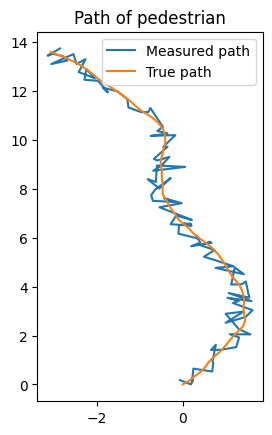

In [73]:
import pickle
import matplotlib.pyplot as plt

with open('example_path.pkl','br') as f:
    true_path, observations = pickle.load(f)
    
plt.subplot(1,2,1)
plt.plot(observations[:,0], observations[:,1])
plt.plot(true_path[:,0], true_path[:,1])
plt.title("Path of pedestrian")
plt.legend(["Measured path", "True path"]);

Notice how jagged the observed path is, whereas the true path is actually quite smooth!

At the end of this notebook you can find the code that was used to generate this path.


### Pseudocode for Particle Filter

In the exercises below you are going to implement a Particle Filter that can estimate the true path 
coordinates with greater precision than the observed coordinates. The following is pseudo-code
that you can use as a guide to implement your particle filter.

1. **Initialization**:
   - Generate $ N $ particles from a prior distribution representing possible initial states of the person.

2. **Prediction (Propagation)**:
   - Update each particle's state using the state transition function and add process noise.
   - $X_t^i = f(X_{t-1}^i) + \eta_t^i $
   - Where $ \eta_t^i \sim \mathcal{N}(0, Q) $.

3. **Update (Weighting)**:
   - Calculate the weight of each particle based on how well it matches the latest observation.
   - $w_t^i = p(Y_t | X_t^i) $
   - Where $ Y_t $ is the observation and $ p(Y_t | X_t^i) $ is the likelihood.

4. **Normalization**:
   - Normalize the weights so they sum to 1:
     $ \tilde{w}_t^i = \frac{w_t^i}{\sum_{j=1}^N w_t^j} $

5. **Resampling**:
   - Resample particles based on their weights to focus on more probable states.
     $ X_t^{i'} \sim \sum_{j=1}^N \tilde{w}_t^j \delta(X_t^j) $

6. **Iteration**:
   - Repeat steps 2 to 5 for each new observation.

### Conceptual Guidance

- **Initialization**: Start by distributing the particles over a reasonable range of initial states, considering the potential initial positions and velocities of the person.
- **Prediction**: Move each particle according to the estimated motion dynamics, adding random noise to account for unpredictability.
- **Update**: Use the sensor measurements to evaluate how likely each particle's state is, assigning higher weights to particles that are closer to the observed position.
- **Resampling**: Focus on particles with higher weights to ensure the algorithm concentrates on more likely states, discarding those that are less likely.

You're going to implement the above example in the following exercises.

---



### Exercise 1: Introduction to Particle Filters

**Objective**: Understand the basic concept of particle filters and implement the initial step of creating particles.

**Mathematical Concept**:
Particle filters estimate the state of a system by representing the probability distribution with a set of particles. Initially, particles are sampled from a prior distribution.

**Equation**:
$$ X_0^i \sim p(X_0) $$

Where $ X_0^i $ is the initial state of the $ i $-th particle, and $ p(X_0) $ is the prior distribution.

**Pseudo Code**:
- Initialize an empty list to store particles.
- For each particle $ i $ from 1 to $ N $:
  - Sample the initial state $ X_0^i $ from the prior distribution $ p(X_0) $.
  - Add the sampled state to the list of particles.

**Explanation**:
1. Define the number of particles $ N $.
2. Define the prior distribution $ p(X_0) $.
3. Use a loop to create $ N $ particles by sampling from $ p(X_0) $.
4. Store these particles in a list.



In [74]:
import random, math
N = 1000 # number of particles 
particles = []
for i in range(N):
    x = random.gauss(0,1)
    y = random.gauss(0,1)
    theta = random.uniform(-math.pi, math.pi)
    v = random.gauss(.1,1)
    particles.append([x,y,theta,v])

### Exercise 2: Particle Propagation

**Objective**: Implement the process of propagating particles based on the system dynamics.

**Mathematical Concept**:
Particles are propagated according to the system's state transition model.

**Equation**:
$$ X_t^i = f(X_{t-1}^i) + \eta $$

Where $ X_t^i $ is the state of the $ i $-th particle at time $ t $, $ f $ is the state transition function, and $ \eta $ represents process noise.

**Pseudo Code**:
- Initialize an empty list to store propagated particles.
- For each particle $ i $ from 1 to $ N $:
  - Get the state $ X_{t-1}^i $ of the particle from the previous time step.
  - Apply the state transition function $ f $ to $ X_{t-1}^i $.
  - Add process noise $ \eta $ to the result.
  - Store the new state $ X_t^i $ in the propagated particles list.

**Explanation**:
1. Define the state transition function $ f $.
2. Define the process noise distribution $ \eta $.
3. Use a loop to propagate each particle using the transition function and noise.
4. Store the propagated particles in a list.

As indicated above, the state transition function for this example is:
$$ f(X_{t-1}) = 
\begin{bmatrix}
x_{t-1} + v_{t-1} \cos(\theta_{t-1}) \Delta t \\
y_{t-1} + v_{t-1} \sin(\theta_{t-1}) \Delta t \\
\theta_{t-1} + \Delta \theta_t \\
v_{t-1}
\end{bmatrix} $$
Where:
- $ \Delta t $: Time step between observations.
- $ \Delta \theta_t $: Change in direction (angle), which can be modeled as a random variable.


In [75]:
def state_transition(state,deltat=0.1):
    x, y, theta, v = state
    xn = x + v * math.cos(theta)*deltat
    yn = y + v * math.sin(theta)*deltat
    thetan = theta + random.gauss(0,.01)
    vn = v
    return [xn, yn, thetan, vn]

prop_particles = []
sd_snoise_x, sd_snoise_y, sd_snoise_theta, sd_snoise_v = [.1]*4
for particle in particles:
    x, y, theta, v = state_transition(particle)
    x += random.gauss(0, sd_snoise_x)
    y += random.gauss(0, sd_snoise_y)
    theta += random.gauss(0, sd_snoise_theta)
    v += random.gauss(0, sd_snoise_v)
    prop_particles.append([x,y,theta,v])

### Exercise 3: Weighting Particles

**Objective**: Implement the process of weighting particles based on their likelihood given the observation.

**Mathematical Concept**:
Each particle is weighted based on the likelihood of the observation given the particle's state.

**Equation**:
$$ w_t^i = p(Y_t | X_t^i) $$

Where $ w_t^i $ is the weight of the $ i $-th particle at time $ t $, $ Y_t $ is the observation, and $ p(Y_t | X_t^i) $ is the likelihood.

**Pseudo Code**:
- Initialize an empty list to store weights.
- For each particle $ i $ from 1 to $ N $:
  - Get the state $ X_t^i $ of the particle.
  - Calculate the likelihood $ p(Y_t | X_t^i) $ of the observation given the state.
  - Store the likelihood as the weight $ w_t^i $.

**Explanation**:
1. Define the likelihood function $ p(Y_t | X_t^i) $.
2. Use a loop to calculate the weight for each particle based on the observation.
3. Store the weights in a list.

In [76]:
from math import exp, sqrt, pi
def normal(x,mu,sigma):
    return exp(-0.5*(x-mu)**2 / sigma) / sqrt(2*pi)

sd_noise_x, sd_noise_y = [.2, .2]
def likelihood(observation, particle_state):
    X, Y = observation
    x, y, _, _ = particle_state
    return normal(X, x, sd_noise_x) * normal(Y, y, sd_noise_y)

weights = []
observation = [.4, .25] # example measurement of X, Y coordinates (actual measurements are stored in 'observations')
for particle in prop_particles:
    w = likelihood(observation, particle)
    weights.append(w)


### Exercise 4: Resampling Particles

**Objective**: Implement the resampling process to handle particle degeneracy.

**Mathematical Concept**:
Particles are resampled based on their weights to focus on more probable states.

**Equation**:
$$ X_t^{i'} \sim \sum_{i=1}^N w_t^i \delta(X_t^i) $$

Where $ X_t^{i'} $ is the resampled particle, and $ \delta $ is the Dirac delta function.

**Pseudo Code**:
- Initialize an empty list to store resampled particles.
- Normalize the weights.
- Compute the cumulative sum of the normalized weights.
- For each particle $ i $ from 1 to $ N $:
  - Generate a random number uniformly between 0 and 1.
  - Find the particle corresponding to the random number in the cumulative distribution.
  - Store the corresponding particle state in the resampled particles list.

For resampling loop you can also use the `random.choices` which implements this for you. (In fact, the weights normalization steps are also performed by this function and can thus be omitted.)

**Explanation**:
1. Normalize the weights to sum to 1.
2. Create a cumulative distribution from the normalized weights.
3. Use a loop to resample particles by drawing random numbers and using the cumulative distribution.
4. Store the resampled particles in a list.

In [78]:
# normalize weights (not necessary for random.choices)
sum_weights = sum(weights,0)
weights_normalized = [w/sum_weights for w in weights]

# sample new particles
new_particles = random.choices(prop_particles, weights_normalized, k=len(prop_particles))

### Exercise 5: Complete Particle Filter Implementation

**Objective**: Combine all previous steps into a complete particle filter algorithm.

**Pseudo Code**:
- Initialize particles using the prior distribution.
- For each time step $ t $:
  - Propagate particles using the state transition function.
  - Calculate weights based on the observation likelihood.
  - Resample particles based on their weights.
- Return the final set of particles as the estimated state distribution.

**Explanation**:
1. Implement the initialization, propagation, weighting, and resampling steps.
2. Loop through each time step to update the particles.
3. The final particles represent the estimated state distribution.

By working through these exercises, you will build a solid understanding of particle filters and their implementation in code.

In [79]:
import random, math
from math import exp, sin, cos, sqrt, pi

def state_transition(state, deltat=0.1, sd_theta=.01):
    x, y, theta, v = state
    xn = x + v * cos(theta)*deltat
    yn = y + v * sin(theta)*deltat
    thetan = theta + sd_theta * random.gauss(0, 1)
    vn = v
    return [xn, yn, thetan, vn]

def normal(x,mu,sigma):
    return exp(-0.5*(x-mu)**2 / sigma) / sqrt(2*pi)

def likelihood(observation, particle_state, sd_noise = [.2, .2]):
    sd_noise_x, sd_noise_y = sd_noise
    X, Y = observation
    x, y, _, _ = particle_state
    return normal(X, x, sd_noise_x) * normal(Y, y, sd_noise_y)

# Initialize particles with the prior distribution
N = 1000
particles = []
for i in range(N):
    x = random.gauss(0,1)
    y = random.gauss(0,1)
    theta = random.uniform(-math.pi, math.pi)
    v = random.gauss(.1,1)
    particles.append([x,y,theta,v])

# Loop over each time step (or rather, over each observation of x-y coordinates)
particle_distributions = [] # list to collect the particles at each time step
for observation in observations:
    # remember the current particles
    particle_distributions.append(particles)
    
    # Propagate particles according to state equation
    prop_particles = []
    sd_snoise_x, sd_snoise_y, sd_snoise_theta, sd_snoise_v = [.1]*4
    for particle in particles:
        x, y, theta, v = state_transition(particle)
        x += random.gauss(0, sd_snoise_x)
        y += random.gauss(0, sd_snoise_y)
        theta += random.gauss(0, sd_snoise_theta)
        v += random.gauss(0, sd_snoise_v)
        prop_particles.append([x,y,theta,v])

    # Compute weights using the current observation
    weights = []
    for particle in prop_particles:
        w = likelihood(observation, particle)
        weights.append(w)

    # normalize weights (actually not necessary for random.choices)
    sum_weights = sum(weights,0)
    weights_normalized = [w/sum_weights for w in weights]

    # sample new particles according to the weights
    particles = random.choices(prop_particles, weights_normalized, k=len(prop_particles))

The sets of particles, one for each time step, represent the probability distribution of the likely true states of the system at that time. From each of these sets, we can compute any desired distribution characteristic, such as the mean, the standard deviation, and so on. We can use the mean as an estimate of the true location. Let's illustrate this

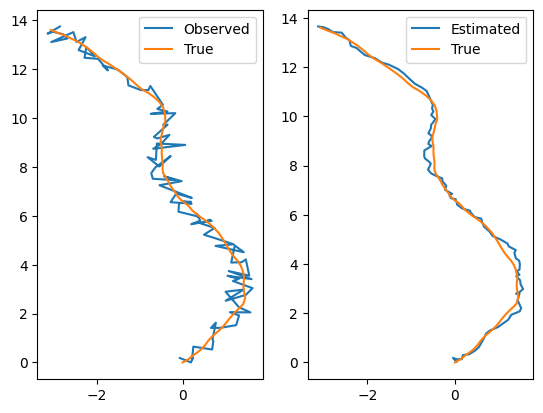

In [80]:
means = np.array(particle_distributions).mean(axis=1) # np.array makes it easier to compute the means across particles

plt.subplot(1,2,1)
plt.plot(observations[:,0], observations[:,1])
plt.plot(true_path[:,0], true_path[:,1])
plt.legend(["Observed","True"])
plt.subplot(1,2,2)
plt.plot(means[:,0],means[:,1])
plt.plot(true_path[:,0], true_path[:,1])
plt.legend(["Estimated","True"])


---

### Generation of sample paths of a person walking through the park

To generate an example path and observations for the "Real-Life Example: Tracking a Walking Person in a Park," we have defined the state transition and observation functions, and then simulated the path of the person along with the noisy observations. 

<details><summary><span style="font-size:200%">🧑‍💻</span>Here is the Python code that we used to achieve this:</summary>

```python
import numpy as np

def generate_path_and_observations(num_steps, delta_t, process_noise_std, observation_noise_std):
    # Initial state [x, y, theta, v]
    initial_state = np.array([0, 0, np.pi/4, 1])
    
    # State transition function
    def state_transition(state, delta_t):
        x, y, theta, v = state
        new_x = x + v * np.cos(theta) * delta_t
        new_y = y + v * np.sin(theta) * delta_t
        new_theta = theta + np.random.normal(0, process_noise_std[2])
        new_v = v + np.random.normal(0, process_noise_std[3])
        return np.array([new_x, new_y, new_theta, new_v])
    
    # Observation function
    def observation_function(state):
        x, y, _, _ = state
        observed_x = x + np.random.normal(0, observation_noise_std[0])
        observed_y = y + np.random.normal(0, observation_noise_std[1])
        return np.array([observed_x, observed_y])
    
    # Generate the true path and observations
    true_path = []
    observations = []
    times = np.arange(0, num_steps * delta_t, delta_t)
    observation_times = times[::5]  # Observations every 5 steps

    current_state = initial_state
    for t in times:
        true_path.append(current_state)
        if t in observation_times:
            observations.append(observation_function(current_state))
        current_state = state_transition(current_state, delta_t)
    
    true_path = np.array(true_path)
    observations = np.array(observations)
    
    return times, observation_times, true_path, observations

# Parameters
num_steps = 100
delta_t = 1.0
process_noise_std = [0.1, 0.1, 0.1, 0.1]  # Standard deviations for x, y, theta, v
observation_noise_std = [0.5, 0.5]  # Standard deviations for x, y observations

times, observation_times, true_path, observations = generate_path_and_observations(num_steps, delta_t, process_noise_std, observation_noise_std)

# Print the results
print("Times:", times)
print("Observation Times:", observation_times)
print("True Path:\n", true_path)
print("Observations:\n", observations)
```

</details>



#### Explanation

1. **Initial State**: The initial state of the person is set to `[0, 0, π/4, 1]`, indicating the starting position at the origin, facing 45 degrees, with a speed of 1 unit per time step.

2. **State Transition Function**: This function updates the person's state based on the current position, direction, and speed. The direction (`theta`) and speed (`v`) include some process noise to simulate changes in direction and speed over time.

3. **Observation Function**: This function simulates the noisy observations of the person's position. The observations are corrupted with Gaussian noise.

4. **Path and Observations Generation**: The function iterates over the specified number of steps, generating the true path and observations at regular intervals. Observations are made every 5 steps.

5. **Parameters**: The function is called with parameters specifying the number of steps, time step duration, process noise standard deviations, and observation noise standard deviations.

This setup creates a non-linear path for the person and provides both the true path and the noisy observations, along with the times for each. This data can be used to test and evaluate a particle filter implementation.

In [54]:
import numpy as np

def generate_path_and_observations(num_steps, delta_t, process_noise_std, observation_noise_std):
    # Initial state [x, y, theta, v]
    initial_state = np.array([0, 0, np.pi/4, 1])
    
    # State transition function
    def state_transition(state, delta_t):
        x, y, theta, v = state
        new_x = x + v * np.cos(theta) * delta_t
        new_y = y + v * np.sin(theta) * delta_t
        new_theta = theta + np.random.normal(0, process_noise_std[2])
        new_v = v + np.random.normal(0, process_noise_std[3])
        return np.array([new_x, new_y, new_theta, new_v])
    
    # Observation function
    def observation_function(state):
        x, y, _, _ = state
        observed_x = x + np.random.normal(0, observation_noise_std[0])
        observed_y = y + np.random.normal(0, observation_noise_std[1])
        return np.array([observed_x, observed_y])
    
    # Generate the true path and observations
    true_path = []
    observations = []
    times = np.arange(0, num_steps * delta_t, delta_t)
    observation_times = times[::1]  # Observations every 5 steps

    current_state = initial_state
    for t in times:
        true_path.append(current_state)
        if t in observation_times:
            observations.append(observation_function(current_state))
        current_state = state_transition(current_state, delta_t)
    
    true_path = np.array(true_path)
    observations = np.array(observations)
    
    return times, observation_times, true_path, observations

# Parameters
num_steps = 100
delta_t = 0.2
process_noise_std = [0.1, 0.1, 0.1, 0.1]  # Standard deviations for x, y, theta, v
observation_noise_std = [0.2, 0.2]  # Standard deviations for x, y observations

times, observation_times, true_path, observations = generate_path_and_observations(num_steps, delta_t, process_noise_std, observation_noise_std)

# Print the results
print("Times:", times)
print("Observation Times:", observation_times)
print("True Path:\n", true_path)
print("Observations:\n", observations)

Times: [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4
 19.6 19.8]
Observation Times: [ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6
 16.8 17.  17.2 17.4 17.6 17.8 18.  18.2 

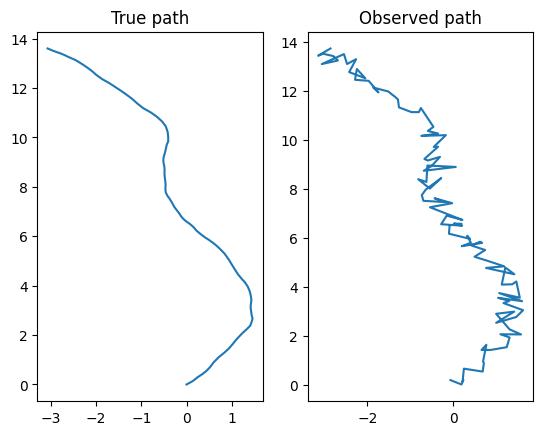

In [55]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(true_path[:,0], true_path[:,1])
plt.title("True path")
plt.subplot(1,2,2)
plt.plot(observations[:,0], observations[:,1])
plt.title("Observed path");

In [60]:
# import pickle
# with open('example_path.pkl','bw') as f:
#     pickle.dump([true_path, observations], f)